## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Loading the cleaned dataset

In [2]:
df = pd.read_csv('Data/df_cleaned.csv')

In [3]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.696,0.8090,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,4
1,0.707,0.6810,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,4
2,0.644,0.7350,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.4180,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,4
3,0.538,0.7420,2,-5.355,1,0.1140,0.1380,0.000047,0.0934,0.2500,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,4
4,0.715,0.6200,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.1720,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,0.261,0.0585,5,-22.054,0,0.0473,0.9870,0.872000,0.0887,0.1380,67.242,2IAnU53rak76TpGpA515Xl,439213,4
13053,0.322,0.1290,1,-20.671,1,0.0437,0.9920,0.003620,0.1010,0.0449,129.018,4zPZbj1sNxCOtU1CdgCK53,260187,4
13054,0.311,0.1580,10,-16.724,1,0.0380,0.9690,0.901000,0.2400,0.1700,96.367,2qYu0I9yKKpGnbySmN6w3K,427653,4
13055,0.456,0.1090,10,-20.268,1,0.0604,0.9940,0.000266,0.0836,0.2400,68.848,1xU1yjwGAGCCE3RiB8YKLe,201640,5


## Feature Selection

The database contains several features. Research shows that using all features might not work the best when using K-means clustering. The reason is some features might provide redundant information which generates noise. 

In order to work around this process 2 options where explored here:

1. feature selection: iterating through different groups of features (5/6) to find the ones which help the clustering algorithm perform better.

2. dimensionality reduction: using PCA technique to reduce the amount of features while keeping the most information from the full dataset. This is explored in the next notebook.

In [3]:
#here different groups are selected based on musical criteria

dance_features = ['danceability', 'tempo', 'energy', 'valence', 'mode', 'id']
lyric_features = ['speechiness', 'instrumentalness', 'acousticness', 'liveness', 'loudness', 'id']
melodic_features = ['key', 'duration_ms', 'tempo', 'mode', 'instrumentalness', 'id']
lyric_features_b = ['speechiness', 'instrumentalness', 'acousticness', 'energy', 'danceability', 'valence','id']

In [4]:
#let's go ahead with this variation

df = pd.DataFrame(df, columns=lyric_features_b)

## Scaling features

Because K-means is a distance based clustering algorith all features must be scaled first.

In [5]:
X = df.drop(columns=['id'])

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

Now, all features will have the same weight.

## Chosing K with elbow method

K-means clustering works by providing beforehand the number of clusters, or k. In order to choose the optimal number, we rely on the elbow method using Silhouette

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

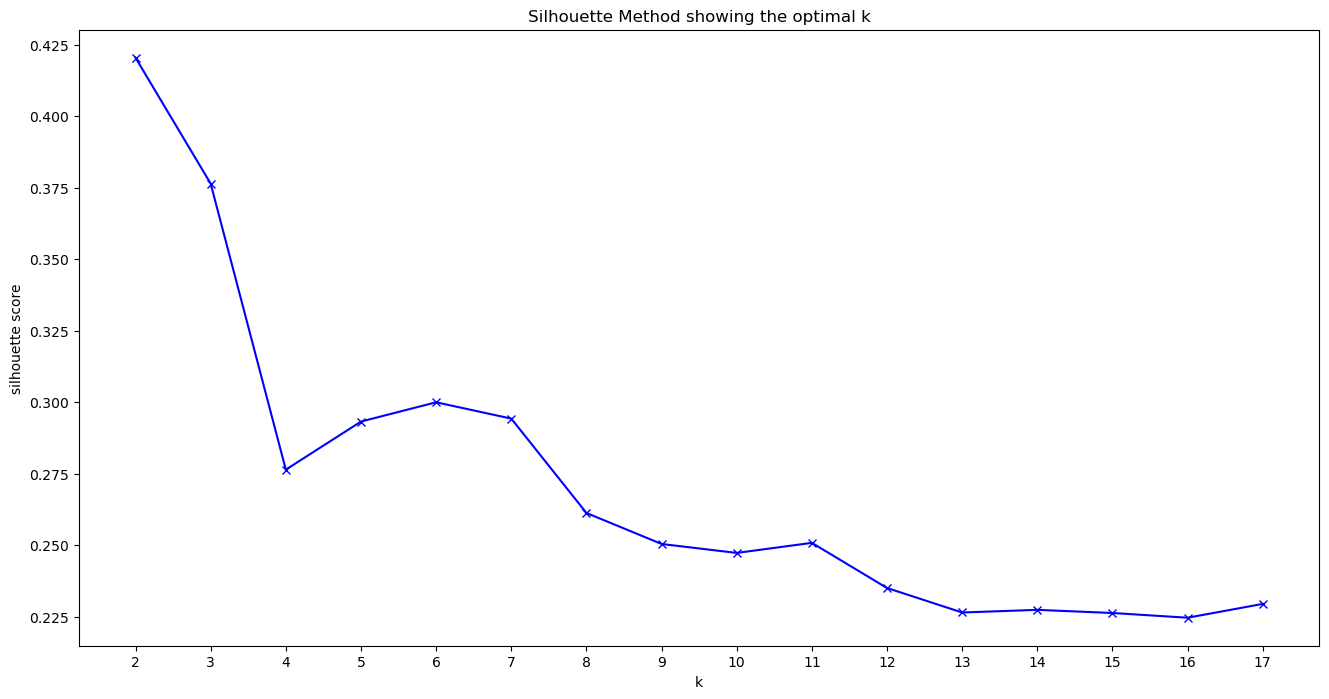

In [9]:
K = range(2, 18)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [10]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

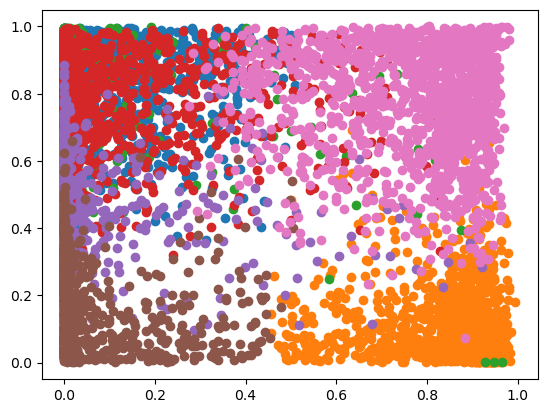

In [11]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    3494
1    1581
2     990
3    3354
4    1425
5     823
6    1390
dtype: int64

Now let's see to which group was assigned every song.

In [13]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters

## Playing with the parameters

In [14]:
kmeans.inertia_

22530.74489996135

# Saving with pickle

In order to load the recommender in the next notebook we need to store information regarding this clustering, i.e. the scaler and model used to cluster this db.

In [15]:
df.to_csv('Data/lyric_features_b.csv', index=False)

In [16]:
# Save both objects together
with open("Model/lyric_features_b.pkl", "wb") as f:
    pickle.dump((scaler, kmeans), f)